# Comcast Telecom Consumer Complaints

In [174]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
#Importing the dataset.
df=pd.read_csv('Comcast_telecom_complaints_data.csv')
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [176]:
#Checking for null values in any coloumn.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [177]:
#Converting 'Date_month_year' column into datetime format
df['Date_month_year']=df['Date_month_year'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [178]:
#Setting Date_month_year as Index to work on trend chart.
df=df.set_index('Date_month_year')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2224 entries, 2015-04-22 to 2015-06-24
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


Text(0.5, 1.0, 'Monthly trend chart')

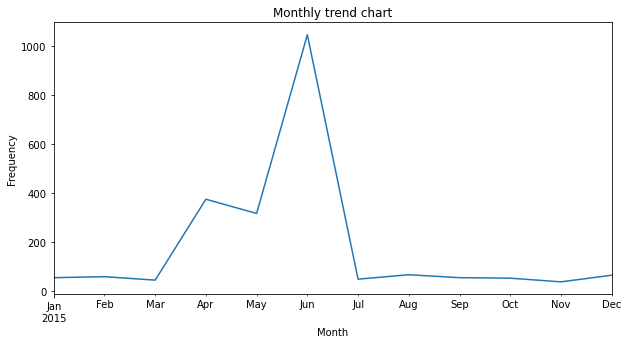

In [179]:
#Plotting Monthly Chart
df.groupby(pd.Grouper(freq='M')).size().plot(figsize=(10,5))
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Monthly trend chart')

Text(0.5, 1.0, 'Daily trend chart')

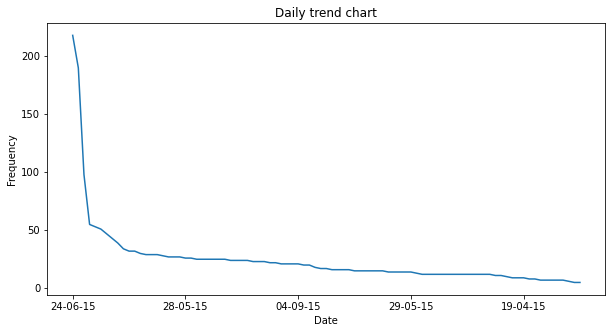

In [180]:
#Plotting Daily chart

df=df.sort_values(by='Date')
plt.figure(figsize=(10,5))
df['Date'].value_counts().plot()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Daily trend chart')

<AxesSubplot:>

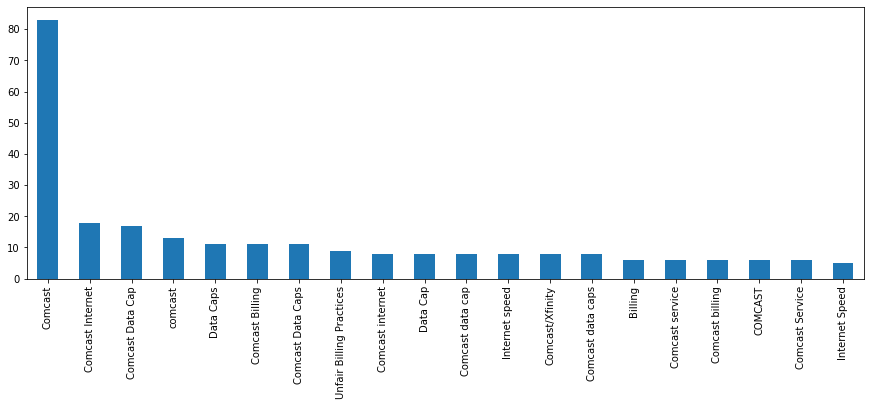

In [171]:
# Frequency of complaint types.
df['Customer Complaint'].value_counts()[:20].plot(kind='bar',figsize=(15,5))

##### Which complaint types are maximum i.e., around internet, network issues, or across any other domains ??

In [173]:
#Calculating the number of issues related to INTERNET such as n/w issue,speed issue etc. :

internet_issue1=df[df['Customer Complaint'].str.contains('network')].count()
internet_issue2=df[df['Customer Complaint'].str.contains('speed')].count()
internet_issue3=df[df['Customer Complaint'].str.contains('data')].count()
internet_issue4=df[df['Customer Complaint'].str.contains('internet')].count()
total_issue_internet=internet_issue1+internet_issue2+internet_issue3+internet_issue4
Internet_Issues=total_issue_internet['Customer Complaint']
Internet_Issues

374

In [103]:
#Calculating the number of issues related to BILLING :

billing_issue1=df[df['Customer Complaint'].str.contains('billing')].count()
billing_issue2=df[df['Customer Complaint'].str.contains('charges')].count()
billing_issue3=df[df['Customer Complaint'].str.contains('bill')].count()
billing_issue4=df[df['Customer Complaint'].str.contains('payment')].count()
total_billing_issues=billing_issue1+billing_issue2+billing_issue3+billing_issue4
Billing_Issues=total_billing_issues['Customer Complaint']
Billing_Issues


363

In [104]:
#Calculating the number of issues related to "SERVICE" : 

service_issue1=df[df['Customer Complaint'].str.contains('service')].count()
service_issue2=df[df['Customer Complaint'].str.contains('customer')].count()
total_service_issues=service_issue1+service_issue2
Service_Issues=total_service_issues['Customer Complaint']
Service_Issues

360

In [105]:
Other_Issues=2224-(Service_Issues+Internet_Issues+Billing_Issues)
Other_Issues

1127

In [185]:

Max=max(Service_Issues,Billing_Issues,Internet_Issues,Other_Issues)
if Max==Service_Issues:
    print("Service_Issues are maximum = ",Service_Issues)
elif Max==Billing_Issues:
    print("Billing_Issues are maximum = ",Billing_Issues)
elif Max==Internet_Issues:
    print("Internet_Issues are maximum = ",Internet_Issues)
else:
    print("Other Issues are maximum = ",Other_Issues)

Other Issues are maximum =  1127


#### Create a new categorical variable with value as Open and Closed. 
#### Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [192]:
df['Updated Status']=['Open' if Status=='Open' or Status=='Pending' else 'Closed' for Status in df['Status']]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2224 entries, 2015-01-04 to 2015-05-31
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
 10  Updated Status               2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 208.5+ KB


In [193]:
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Updated Status
Date_month_year,,,,,,,,,,,
2015-01-04,211976,Fraudulent claims reported to collections agency,04-01-15,1:26:53 PM,Customer Care Call,Atlanta,Georgia,30312,Closed,No,Closed
2015-01-04,211677,Comcast refusal of service,04-01-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No,Closed
2015-01-04,212507,Comcast Cable,04-01-15,3:54:43 PM,Internet,Franklin,Tennessee,37067,Closed,No,Closed
2015-01-04,213120,Data Overages,04-01-15,8:05:57 PM,Internet,Savannah,Georgia,31406,Closed,No,Closed
2015-01-04,211478,Comcast,04-01-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No,Closed


#### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
#### ~ Which state has the maximum complaints
#### ~Which state has the highest percentage of unresolved complaints

In [188]:
state_wise_complain=df.groupby(['State','Updated Status']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)
state_wise_complain

Updated Status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


<AxesSubplot:xlabel='State'>

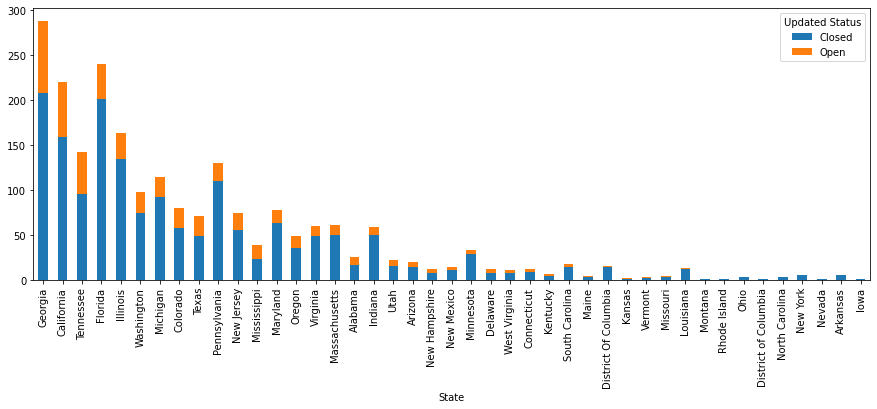

In [189]:
state_wise_complain.plot.bar(figsize=(15,5),stacked=True)

In [190]:
#Which state has the maximum complaints
df.groupby(['State']).size().sort_values(ascending=False)[:10]

State
Georgia         288
Florida         240
California      220
Illinois        164
Tennessee       143
Pennsylvania    130
Michigan        115
Washington       98
Colorado         80
Maryland         78
dtype: int64

In [194]:
# Which states has the highest number of unresolved complaints
state_wise_complain_per=df.groupby(['State','Updated Status']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)
state_wise_complain_per['Unresolved Complaints %']=state_wise_complain['Open']/state_wise_complain['Open'].sum()*100
state_wise_complain_per

Updated Status,Closed,Open,Unresolved Complaints %
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


#### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [195]:
resolved_via=df.groupby(['Received Via','Updated Status']).size().unstack().fillna(0)
resolved_via['% of resolved Complaints']=resolved_via['Closed']/resolved_via['Closed'].sum()*100
resolved_via

Updated Status,Closed,Open,% of resolved Complaints
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886


<AxesSubplot:ylabel='Received Via'>

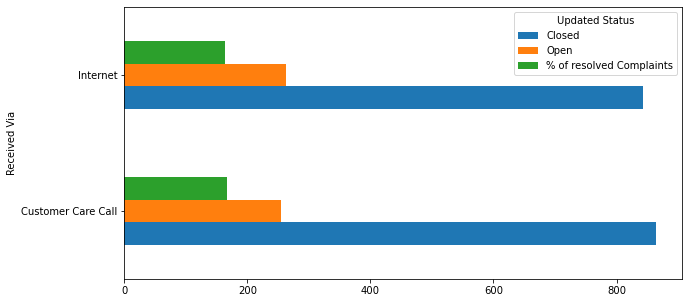

In [155]:
resolved_via.plot(kind='barh',figsize=(10,5))